In [1]:
!git clone https://github.com/shining0611armor/Implementation-of-a-Denoising-Diffusion-Probabilistic-Model-DDPM-.git

%cd Implementation-of-a-Denoising-Diffusion-Probabilistic-Model-DDPM-/PersianDataset_implementation_files/

Cloning into 'Implementation-of-a-Denoising-Diffusion-Probabilistic-Model-DDPM-'...
remote: Enumerating objects: 48, done.
remote: Counting objects: 100% (48/48), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 48 (delta 12), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (48/48), 22.82 KiB | 5.71 MiB/s, done.
Resolving deltas: 100% (12/12), done.
/content/Implementation-of-a-Denoising-Diffusion-Probabilistic-Model-DDPM-/PersianDataset_implementation_files


In [2]:
ls

Dataset.py  diffusion_model.py  main.py  requirement.txt  unet.py  utils.py


In [3]:
!pip3 install -r requirement.txt

import os

assert os.path.exists("main.py"), "main.py not found"
assert os.path.exists("Dataset.py"), "Dataset.py not found"
assert os.path.exists("utils.py"), "utils.py not found"
assert os.path.exists("diffusion_model.py"), "diffusion_model.py not found"
assert os.path.exists("unet.py"), "unet.py not found"
assert os.path.exists("requirement.txt"), "requirement.txt not found"



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 1.2 MB/s eta 0:00:00


In [4]:
!gdown --id 1bK1gYdxK92jXtDAcuUvITx6pa4CnyPAw -O /content/dataset.zip
!unzip -q /content/dataset.zip -d /content/dataset
!rm /content/dataset.zip


/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1bK1gYdxK92jXtDAcuUvITx6pa4CnyPAw
From (redirected): https://drive.google.com/uc?id=1bK1gYdxK92jXtDAcuUvITx6pa4CnyPAw&confirm=t&uuid=4d72ca11-122c-4a47-a036-47209e5290f3
To: /content/dataset.zip
100% 176M/176M [00:02<00:00, 78.4MB/s]


In [5]:
from Dataset import get_data_loaders
from utils import *
import utils


Downloading...
From (original): https://drive.google.com/uc?export=download&id=1bK1gYdxK92jXtDAcuUvITx6pa4CnyPAw
From (redirected): https://drive.google.com/uc?export=download&id=1bK1gYdxK92jXtDAcuUvITx6pa4CnyPAw&confirm=t&uuid=f75f2e9a-ed1a-4918-9099-f13fa0fd1cb7
To: /content/dataset.zip
100%|██████████| 176M/176M [00:01<00:00, 162MB/s]


In [ ]:
!python3 main.py

from IPython.display import Image, display
display(Image(filename="train_images.png"))
display(Image(filename="test_images.png"))
print("samples of dataset images are saved successfully!")



In [7]:
from diffusion_model import *


samples of dataset images are saved successfully!
Using device: cuda	Tesla T4


In [ ]:

import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Define a dummy backward process model for illustration purposes
class BackwardProcessModel(nn.Module):
    def __init__(self):
        super(BackwardProcessModel, self).__init__()

    def forward(self, x, t):
        pass

device = "cuda" if torch.cuda.is_available() else "cpu"

train_loader, test_loader = get_data_loaders(batch_size=128)

backward_model = BackwardProcessModel().to(device)
diffusion_model = DiffusionModel(backward_model, beta_start=0.0001, beta_end=0.02, timesteps=1000, device=device).to(device)

for batch_idx, (data, target) in enumerate(train_loader):
    data = data.to(device)
    timesteps_to_visualize = [0, 25, 50, 75, 100, 150, 200, 500, 750, 999]
    fig, axes = plt.subplots(1, len(timesteps_to_visualize), figsize=(15, 3))

    for i, timestep in enumerate(timesteps_to_visualize):
        x_t, noise = diffusion_model.add_noise(data, timestep, visualization=True)
        ax = axes[i]
        ax.imshow(x_t[0].cpu().detach().numpy().squeeze(), cmap='gray')
        ax.set_title(f"Timestep {timestep}")
        ax.axis('off')

    plt.show()
    break

print("Visualization complete!")

In [9]:
from unet import sinusoidal_embedding, MyUNet

n_steps, beta_start, beta_end = 1000, 10 ** -4, 0.02  # Originally used by the authors

ddpm = DiffusionModel( MyUNet(n_steps), beta_start, beta_end, n_steps, device="cuda").to(device)
print(sum([p.numel() for p in ddpm.parameters()]))

1348516


In [ ]:
from diffusion_model import sample
from utils import show_images

print("Generating new images")
generated = sample(ddpm, gif_name="before_training.gif")
show_images(generated, "Images generated before training")

Training progress:   0%|          | 0/15 [00:00<?, ?it/s]

Epoch 1/15 - Training:   0%|          | 0/1092 [00:00<?, ?it/s]

Epoch 1/15 - Validation:   0%|          | 0/58 [00:00<?, ?it/s]

Epoch 1/15 - Training Loss: 0.055, Validation Loss: 0.014, Learning Rate: 0.001000 --> saving best model


Epoch 2/15 - Training:   0%|          | 0/1092 [00:00<?, ?it/s]

Epoch 2/15 - Validation:   0%|          | 0/58 [00:00<?, ?it/s]

Epoch 2/15 - Training Loss: 0.013, Validation Loss: 0.012, Learning Rate: 0.001000 --> saving best model


Epoch 3/15 - Training:   0%|          | 0/1092 [00:00<?, ?it/s]

Epoch 3/15 - Validation:   0%|          | 0/58 [00:00<?, ?it/s]

Epoch 3/15 - Training Loss: 0.012, Validation Loss: 0.012, Learning Rate: 0.001000 --> saving best model


Epoch 4/15 - Training:   0%|          | 0/1092 [00:00<?, ?it/s]

Epoch 4/15 - Validation:   0%|          | 0/58 [00:00<?, ?it/s]

Epoch 4/15 - Training Loss: 0.012, Validation Loss: 0.012, Learning Rate: 0.001000 --> saving best model


Epoch 5/15 - Training:   0%|          | 0/1092 [00:00<?, ?it/s]

Epoch 5/15 - Validation:   0%|          | 0/58 [00:00<?, ?it/s]

Epoch 5/15 - Training Loss: 0.011, Validation Loss: 0.011, Learning Rate: 0.001000 --> saving best model


Epoch 6/15 - Training:   0%|          | 0/1092 [00:00<?, ?it/s]

Epoch 6/15 - Validation:   0%|          | 0/58 [00:00<?, ?it/s]

Epoch 6/15 - Training Loss: 0.011, Validation Loss: 0.010, Learning Rate: 0.001000 --> saving best model


Epoch 7/15 - Training:   0%|          | 0/1092 [00:00<?, ?it/s]

Epoch 7/15 - Validation:   0%|          | 0/58 [00:00<?, ?it/s]

Epoch 7/15 - Training Loss: 0.011, Validation Loss: 0.011, Learning Rate: 0.001000 --> saving best model


Epoch 8/15 - Training:   0%|          | 0/1092 [00:00<?, ?it/s]

Epoch 8/15 - Validation:   0%|          | 0/58 [00:00<?, ?it/s]

Epoch 8/15 - Training Loss: 0.010, Validation Loss: 0.010, Learning Rate: 0.001000 --> saving best model


Epoch 9/15 - Training:   0%|          | 0/1092 [00:00<?, ?it/s]

Epoch 9/15 - Validation:   0%|          | 0/58 [00:00<?, ?it/s]

Epoch 9/15 - Training Loss: 0.010, Validation Loss: 0.011, Learning Rate: 0.001000


Epoch 10/15 - Training:   0%|          | 0/1092 [00:00<?, ?it/s]

Epoch 10/15 - Validation:   0%|          | 0/58 [00:00<?, ?it/s]

Epoch 10/15 - Training Loss: 0.010, Validation Loss: 0.010, Learning Rate: 0.000500 --> saving best model


Epoch 11/15 - Training:   0%|          | 0/1092 [00:00<?, ?it/s]

Epoch 11/15 - Validation:   0%|          | 0/58 [00:00<?, ?it/s]

Epoch 11/15 - Training Loss: 0.010, Validation Loss: 0.009, Learning Rate: 0.000500 --> saving best model


Epoch 12/15 - Training:   0%|          | 0/1092 [00:00<?, ?it/s]

Epoch 12/15 - Validation:   0%|          | 0/58 [00:00<?, ?it/s]

Epoch 12/15 - Training Loss: 0.010, Validation Loss: 0.010, Learning Rate: 0.000500 --> saving best model


Epoch 13/15 - Training:   0%|          | 0/1092 [00:00<?, ?it/s]

Epoch 13/15 - Validation:   0%|          | 0/58 [00:00<?, ?it/s]

Epoch 13/15 - Training Loss: 0.010, Validation Loss: 0.010, Learning Rate: 0.000500


Epoch 14/15 - Training:   0%|          | 0/1092 [00:00<?, ?it/s]

Epoch 14/15 - Validation:   0%|          | 0/58 [00:00<?, ?it/s]

Epoch 14/15 - Training Loss: 0.010, Validation Loss: 0.010, Learning Rate: 0.000500


Epoch 15/15 - Training:   0%|          | 0/1092 [00:00<?, ?it/s]

Epoch 15/15 - Validation:   0%|          | 0/58 [00:00<?, ?it/s]

Epoch 15/15 - Training Loss: 0.010, Validation Loss: 0.010, Learning Rate: 0.000500 --> saving best model


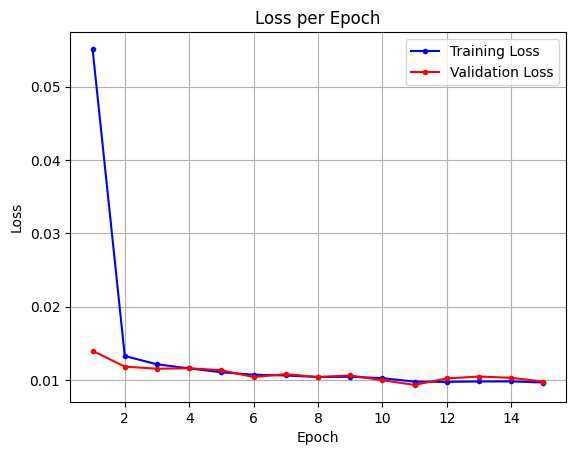

In [ ]:
from diffusion_model import training_loop
optim = Adam(ddpm.parameters(), lr=0.001)
epoch_losses = training_loop(ddpm, train_loader,test_loader, 15, optim, device, store_path="persian.pt")


In [10]:
# Loading the trained model
best_model = DiffusionModel( MyUNet(n_steps), beta_start, beta_end, n_steps, device="cuda").to(device)
best_model.load_state_dict(torch.load("persian.pt", map_location=device))
best_model.eval()
print("Model loaded")

Model loaded


In [11]:
# Evaluate the model
test_loss = evaluate(best_model, test_loader, device=device)
print(f"Test Loss: {test_loss:.4f}")

Test Loss: 0.0096


Generating new images


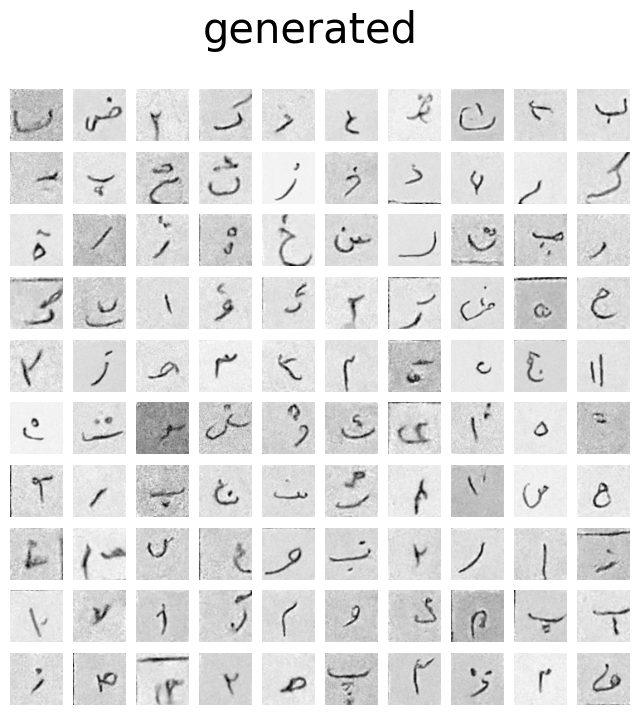

In [ ]:
print("Generating new images")
generated = sample(
        best_model,
        n_samples=100,
        device=device,
        gif_name= "persian.gif"
    )
show_images2(generated, "generated")